In [1]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model
import pandas as pd 
from sklearn.metrics import mean_squared_error


#Ce îi poate face pe oameni fericiți? - dupa PIB
def readData(dataPath: str):
    df = pd.read_csv(dataPath, delimiter=',', header='infer')
    df = df.dropna()
    return df


def plotDataDistribution(dfWorldHappiness):
    fig, axes = plt.subplots(nrows=2, figsize=(15,15))
    axes[0].hist(dfWorldHappiness["Happiness.Score"])
    axes[0].set_title("Happiness")
    axes[1].hist(dfWorldHappiness["Economy..GDP.per.Capita."])
    axes[1].set_title("PIB")
    plt.show()

def plotData(dfWorldHappiness):
    fig, axes = plt.subplots()
    axes.plot(dfWorldHappiness["Economy..GDP.per.Capita."], dfWorldHappiness["Happiness.Score"], 'ro')
    axes.set_xlabel('GDP')
    axes.set_ylabel('Happiness')
    axes.set_title('Relation between GDP and Happiness')
    plt.show()

def getTrainingAndValidationSets(dfWorldHappiness):
    dataSize = dfWorldHappiness.shape[0]
    
    trainingIndexSet = np.random.choice(range(dataSize), size=int(0.8 * dataSize), replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet]

    trainingInputSet = [dfWorldHappiness["Economy..GDP.per.Capita."].iloc[index] for index in trainingIndexSet]
    trainingOutputSet = [dfWorldHappiness["Happiness.Score"].iloc[index] for index in trainingIndexSet]

    validationInputSet = [dfWorldHappiness["Economy..GDP.per.Capita."].iloc[index] for index in validationIndexSet]
    validationOutputSet = [dfWorldHappiness["Happiness.Score"].iloc[index] for index in validationIndexSet]

    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet


def plotTrainingAndValidationSets(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets(dfWorldHappiness)
    fig, axes = plt.subplots()

    plt.plot(trainingInputSet, trainingOutputSet, 'ro', label='TRAINING DATA')
    #training data = cercuri rosii

    plt.plot(validationInputSet, validationOutputSet, 'g^', label='VALIDATION DATA')
    #validation data = triunghiuri verzi

    axes.set_title("Training and validation data")
    axes.set_xlabel("GDP")
    axes.set_ylabel("HAPPINESS")
    plt.legend()
    plt.show()
    

def getRegressorFromLibrary(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(dfWorldHappiness)
    X = [[el] for el in trainingInputSet]
    regressor = linear_model.SGDRegressor()
    regressor.fit(X, trainingOutputSet)
    return regressor

def plotRegressor(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(dfWorldHappiness)
    regressor = getRegressorFromLibrary(dfWorldHappiness)
    w0, w1 = regressor.intercept_, regressor.coef_[0]
    numberOfPoints = 1000
    xref = []
    val = min(trainingInputSet)
    step = (max(trainingInputSet) - min(trainingInputSet)) / numberOfPoints
    for i in range(1, numberOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1*el for el in xref]

    fig, axes = plt.subplots()
    axes.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'TRAINING DATA')
    #training data = cercuri rosii

    axes.plot(xref, yref, 'b-', label= 'LEARNED MODEL')
    #linii albastre

    axes.set_title('Training data and learned model')
    axes.set_xlabel('GDP')
    axes.set_ylabel('HAPPINESS')
    axes.legend()
    plt.show()

def getErrors(dfWorldHappiness):
    _,_, validationInputSet, validationOutputSet = getTrainingAndValidationSets(dfWorldHappiness)
    regressor = getRegressorFromLibrary(dfWorldHappiness)
    computedValidationOutputs = regressor.predict([[x] for x in validationInputSet])
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputSet):
        manualError += (t1 - t2)**2
    manualError = manualError / len(validationOutputSet)
    computedError = mean_squared_error(validationOutputSet, computedValidationOutputs)
    return manualError, computedError

# PROBLEMA 1 - Ce ii face pe oameni fericiti? - dupa PIB

## Distributia datelor

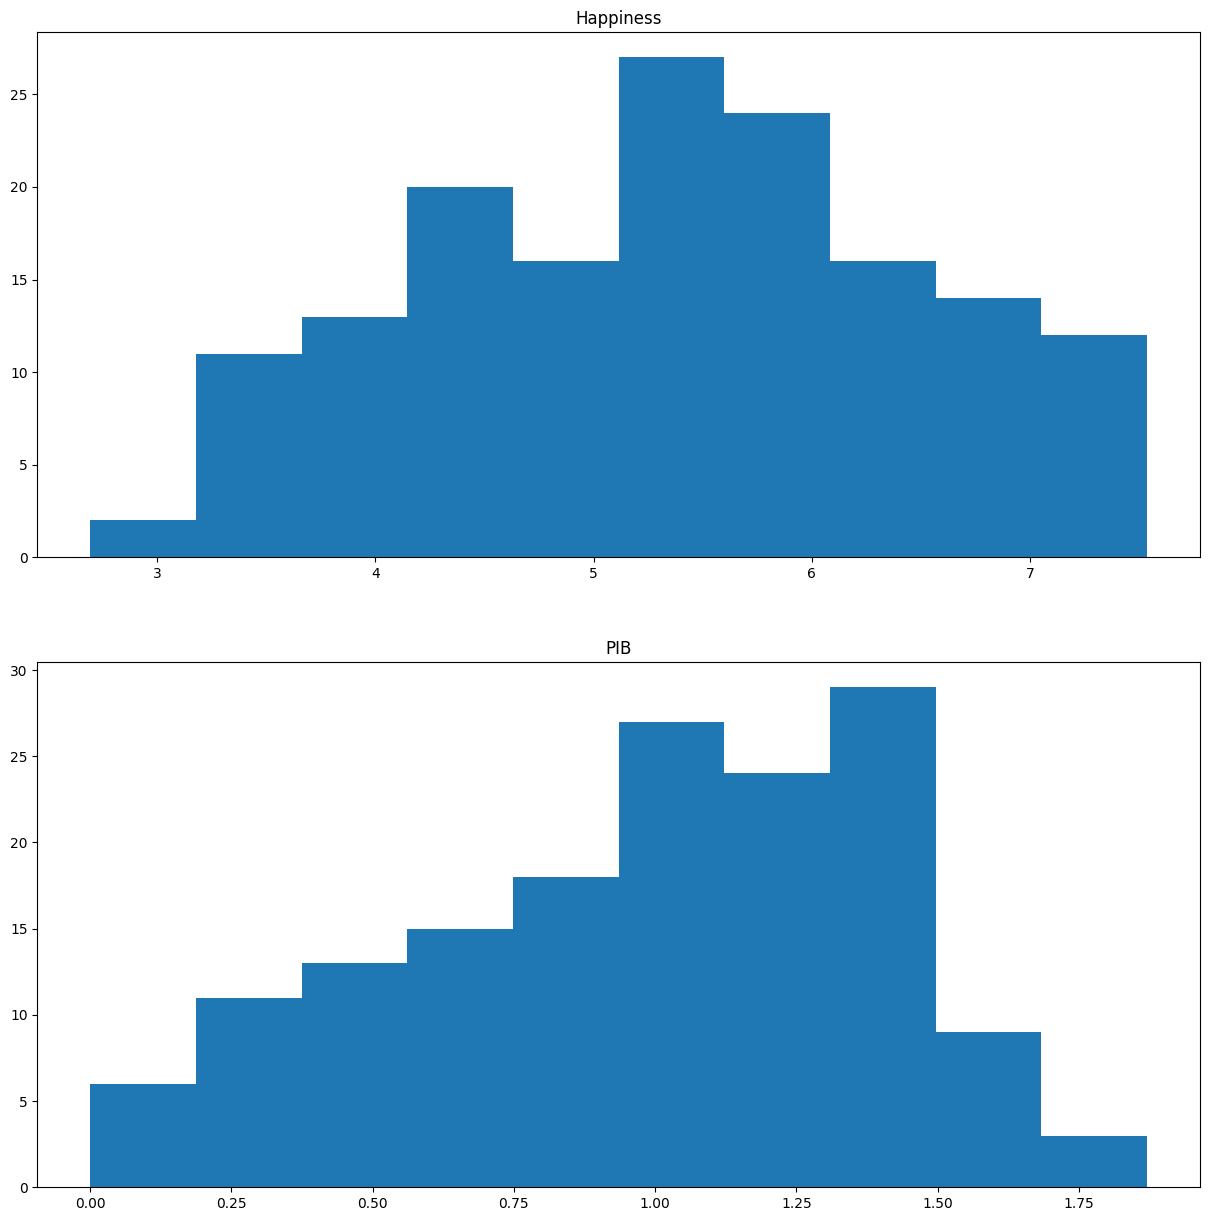

In [2]:
worldHappiness = readData("2017.csv");
plotDataDistribution(worldHappiness)

## Plot data

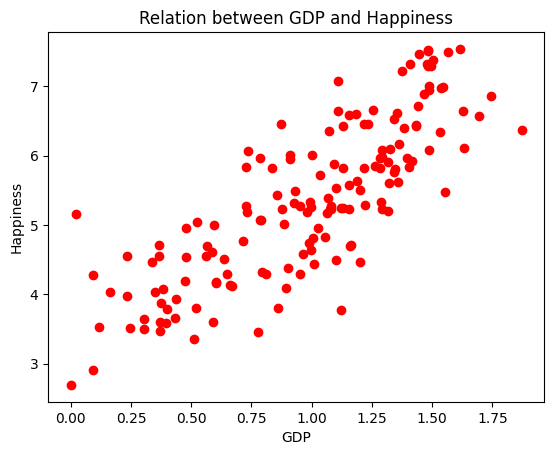

In [3]:
plotData(worldHappiness)

## Impartirea datelor in date de antrenament si date de test

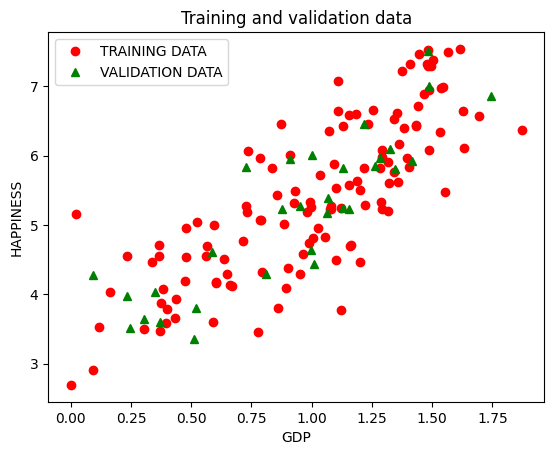

In [4]:
plotTrainingAndValidationSets(worldHappiness)

## Regresor

LEARNED MODEL: f(x) =  [2.7092654]  +  2.621527501851131  * x
MANUAL ERROR =  0.4367379855584788
COMPUTED ERROR =  0.4367379855584788


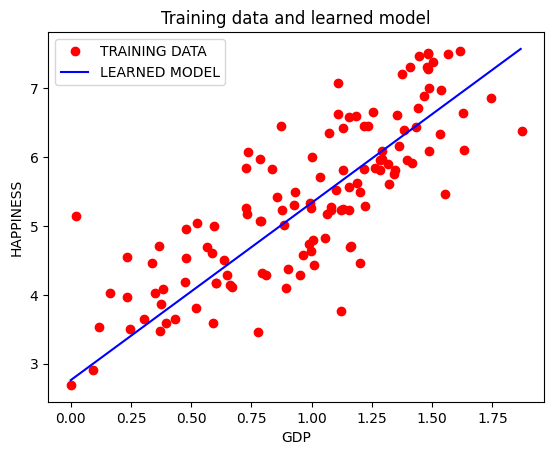

In [5]:
regressor = getRegressorFromLibrary(worldHappiness)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print("LEARNED MODEL: f(x) = ", w0, " + ", w1, " * x")

manualError, computedError = getErrors(worldHappiness)
print("MANUAL ERROR = ", manualError)
print("COMPUTED ERROR = ", computedError)
plotRegressor(worldHappiness)

In [10]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model
import pandas as pd 
from sklearn.metrics import mean_squared_error

#Problema 1 - pib si freedom

def readData2(dataPath: str):
    world_happiness = pd.read_csv(dataPath, delimiter=',', header='infer')
    world_happiness["Happiness.Score"] = world_happiness["Happiness.Score"].fillna(world_happiness["Happiness.Score"].mode()[0])
    world_happiness["Economy..GDP.per.Capita."] = world_happiness["Economy..GDP.per.Capita."].fillna(world_happiness["Economy..GDP.per.Capita."].mode()[0])
    world_happiness["Freedom"] = world_happiness["Freedom"].fillna(world_happiness["Freedom"].mode()[0])
    
    q1= world_happiness["Happiness.Score"].quantile(0.01)
    q2= world_happiness["Happiness.Score"].quantile(0.99)

    world_happiness = world_happiness[world_happiness["Happiness.Score"].between(q1,q2)]

    q3= world_happiness["Economy..GDP.per.Capita."].quantile(0.01)
    q4= world_happiness["Economy..GDP.per.Capita."].quantile(0.99)

    world_happiness = world_happiness[world_happiness["Economy..GDP.per.Capita."].between(q3,q4)]

    q5= world_happiness["Freedom"].quantile(0.01)
    q6= world_happiness["Freedom"].quantile(0.99)

    world_happiness = world_happiness[world_happiness["Freedom"].between(q5,q6)]
    return world_happiness


def plotDataDistribution2(dfWorldHappiness):
    fig, axes = plt.subplots(nrows=3, figsize=(15,15))
    axes[0].hist(dfWorldHappiness["Happiness.Score"])
    axes[0].set_title("Happiness")
    axes[1].hist(dfWorldHappiness["Economy..GDP.per.Capita."])
    axes[1].set_title("PIB")
    axes[2].hist(dfWorldHappiness["Freedom"])
    axes[2].set_title("Freedom")
    plt.show()

def plotData2(dfWorldHappiness):
    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')
    axes.scatter(dfWorldHappiness["Economy..GDP.per.Capita."], dfWorldHappiness["Freedom"],dfWorldHappiness["Happiness.Score"], 'ro')
    axes.set_xlabel('GDP')
    axes.set_ylabel('Freedom')
    axes.set_zlabel('Happiness')
    axes.set_title('Relation between GDP, Freedom and Happiness')
    plt.show()

def getTrainingAndValidationSets2(dfWorldHappiness):
    dataSize = dfWorldHappiness.shape[0]
    
    trainingIndexSet = np.random.choice(range(dataSize), size=int(0.8 * dataSize), replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet]

    trainingInputSet = [[dfWorldHappiness["Economy..GDP.per.Capita."].iloc[index], dfWorldHappiness["Freedom"].iloc[index]] for index in trainingIndexSet]
    trainingOutputSet = [dfWorldHappiness["Happiness.Score"].iloc[index] for index in trainingIndexSet]

    validationInputSet = [[dfWorldHappiness["Economy..GDP.per.Capita."].iloc[index], dfWorldHappiness["Freedom"].iloc[index]] for index in validationIndexSet]
    validationOutputSet = [dfWorldHappiness["Happiness.Score"].iloc[index] for index in validationIndexSet]

    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet


def plotTrainingAndValidationSets2(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets2(dfWorldHappiness)
    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')
    xvalue = [pereche[0] for pereche in trainingInputSet] #gdp
    yvalue = [pereche[1] for pereche in trainingInputSet] #freedom
    zvalue = trainingOutputSet #happiness

    xvalueValidation = [pereche[0] for pereche in validationInputSet] #gdp
    yvalueValidation = [pereche[1] for pereche in validationInputSet] #freedom
    zvalueValidation = validationOutputSet #happiness

    axes.scatter(xvalue, yvalue, zvalue, 'ro')
    axes.scatter(xvalueValidation, yvalueValidation, zvalueValidation, 'g^')

    axes.set_xlabel('GDP')
    axes.set_ylabel('Freedom')
    axes.set_zlabel('Happiness')
    axes.set_title('Relation between GDP, Freedom and Happiness')
    plt.show()
    

def getRegressorFromLibrary2(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets2(dfWorldHappiness)
    X = [el for el in trainingInputSet]
    regressor = linear_model.SGDRegressor()
    regressor.fit(X, trainingOutputSet)
    return regressor

def plotRegressor2(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets2(dfWorldHappiness)
    trainingInputSet = np.array(trainingInputSet)  # Convert to NumPy array
    regressor = getRegressorFromLibrary2(dfWorldHappiness)
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    
    # Generate data for plotting the plane
    x_min, x_max = np.min(trainingInputSet[:,0]), np.max(trainingInputSet[:,0])
    y_min, y_max = np.min(trainingInputSet[:,1]), np.max(trainingInputSet[:,1])
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))
    zz = w0 + w1 * xx + w2 * yy

    # Plot the data points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(trainingInputSet[:,0], trainingInputSet[:,1], trainingOutputSet, c='b', marker='o', label='Training Data')
    
    # Plot the plane representing the model
    ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis', label='Model Plane')
    
    ax.set_title('Training Data and Model Plane')
    ax.set_xlabel('GDP')
    ax.set_ylabel('Freedom')
    ax.set_zlabel('Happiness')
    
    plt.show()

def getErrors2(dfWorldHappiness):
    _,_, validationInputSet, validationOutputSet = getTrainingAndValidationSets2(dfWorldHappiness)
    regressor = getRegressorFromLibrary2(dfWorldHappiness)
    computedValidationOutputs = regressor.predict(validationInputSet)
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputSet):
        manualError += (t1 - t2)**2
    manualError = manualError / len(validationOutputSet)
    computedError = mean_squared_error(validationOutputSet, computedValidationOutputs)
    return manualError, computedError


# PROBLEMA 1 - Ce ii face pe oameni fericiti? - dupa PIB si Freedom

## Distributia datelor

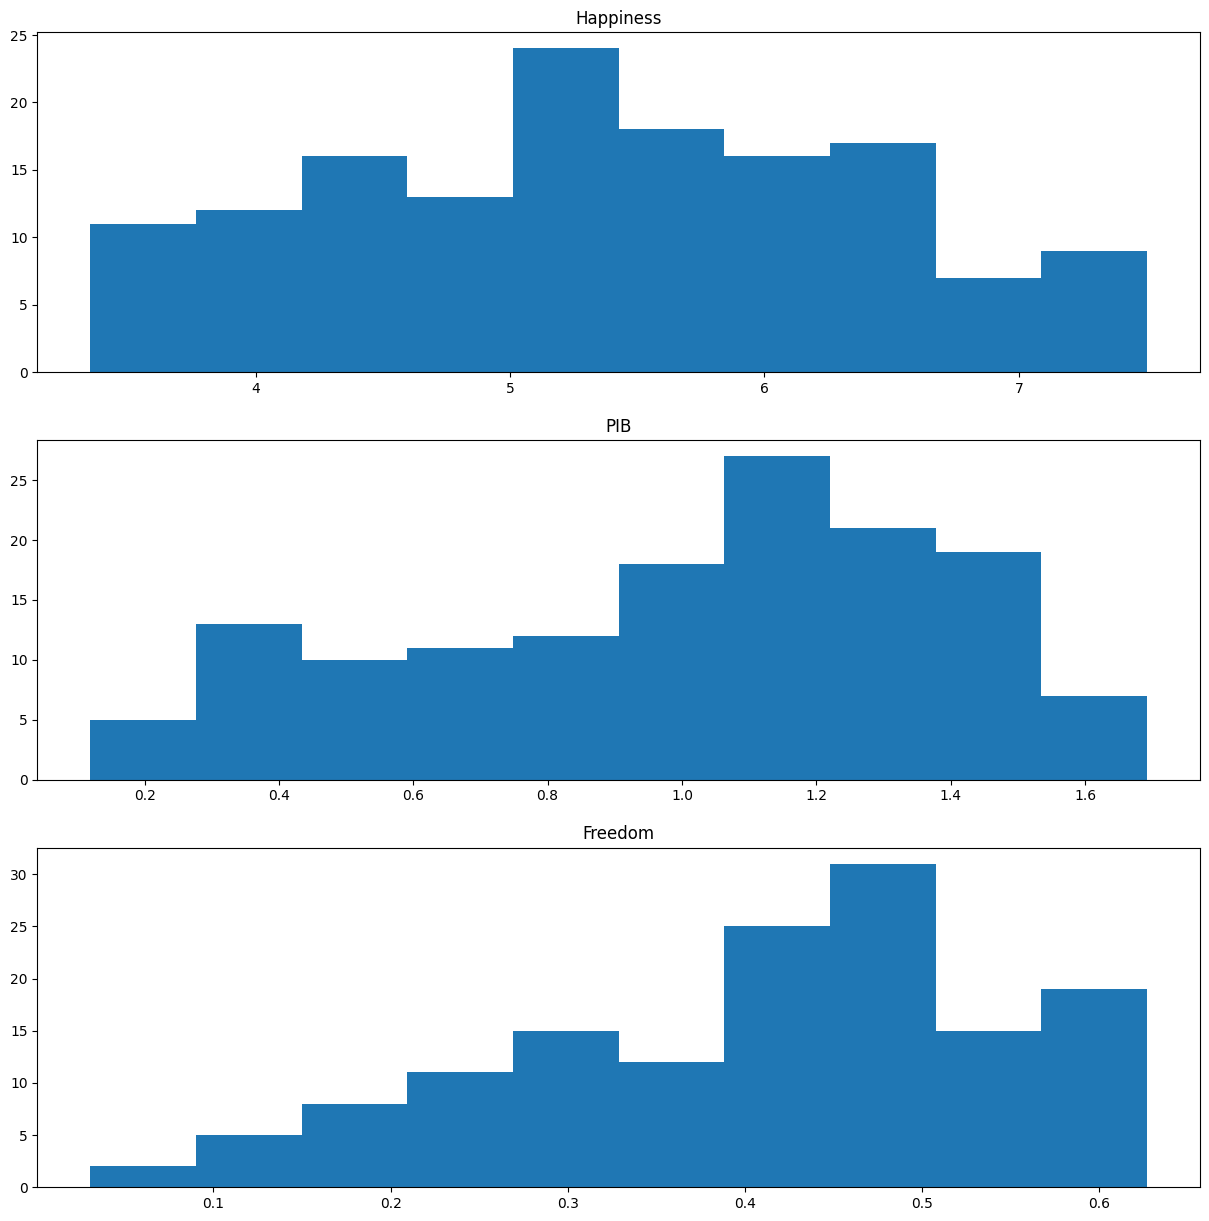

In [11]:
worldHappiness2 = readData2("2017.csv");
plotDataDistribution2(worldHappiness2)

## Plot data

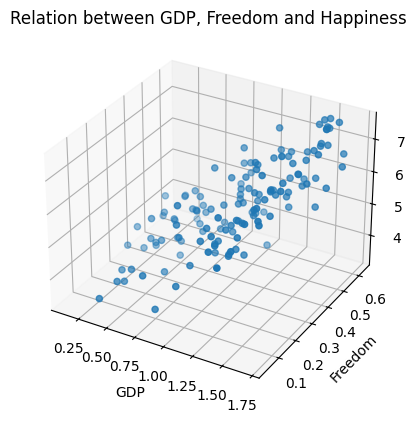

In [12]:
plotData2(worldHappiness2)

## Impartirea datelor in date de antrenament si date de test

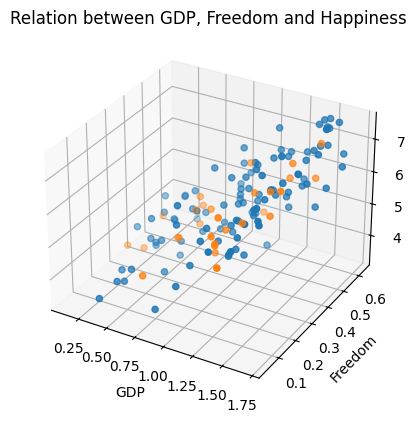

In [13]:
plotTrainingAndValidationSets2(worldHappiness2)

## Regresor

LEARNED MODEL: f(x) =  2.381319411183355  +  2.4954246093533277  * x1  +  1.0403491406465115  * x2
MANUAL ERROR =  0.3597793163036881
COMPUTED ERROR =  0.35977931630368815


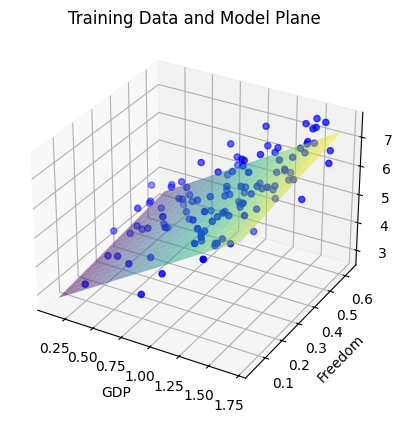

In [15]:
regressor2 = getRegressorFromLibrary2(worldHappiness2)
w0, w1, w2 = regressor2.intercept_[0], regressor2.coef_[0], regressor2.coef_[1]
print("LEARNED MODEL: f(x) = ", w0, " + ", w1, " * x1", " + ", w2, " * x2")

manualError2, computedError2 = getErrors2(worldHappiness2)
print("MANUAL ERROR = ", manualError2)
print("COMPUTED ERROR = ", computedError2)
plotRegressor2(worldHappiness2)

# PROBLEMA 1 : Regresor - cod propriu

In [40]:
class MyRegressor:
    def __init__(self) -> None:
        self.coeficienti = []
        
    def computeValue(self, line):
        number = 0
        for i in range(0, len(line)):
            number += line[i] * self.coeficienti[i]
        return number
    
    def train(self, input, output, learning_rate=0.01, epochs=1000):
        newInput = [[1] + line for line in input]
        
        for feature in range(0, len(newInput[-1])):
            self.coeficienti.append(0.0)

        for epoch in range(0, epochs):
            error = [0 for i in range(0, len(newInput[-1]))]
            for i in range(0, len(newInput)):
                computedValue = self.computeValue(newInput[i])
                err = computedValue - output[i]

                for j in range(0, len(newInput[-1])):
                    error[j] += err * newInput[i][j]
            
            for coef_index in range(0,len(self.coeficienti)):
                self.coeficienti[coef_index] = self.coeficienti[coef_index] - learning_rate * error[coef_index]/len(newInput)         

    def predict(self, input):
        output = []
        for line in input:
            value = self.computeValue([1] + line)
            output.append(value)
        return output


In [41]:
def readData3(dataPath: str):
    df = pd.read_csv(dataPath, delimiter=',', header='infer')
    df = df.dropna()
    return df


def plotDataDistribution3(dfWorldHappiness):
    fig, axes = plt.subplots(nrows=2, figsize=(15,15))
    axes[0].hist(dfWorldHappiness["Happiness.Score"])
    axes[0].set_title("Happiness")
    axes[1].hist(dfWorldHappiness["Economy..GDP.per.Capita."])
    axes[1].set_title("PIB")
    plt.show()

def plotData3(dfWorldHappiness):
    fig, axes = plt.subplots()
    axes.plot(dfWorldHappiness["Economy..GDP.per.Capita."], dfWorldHappiness["Happiness.Score"], 'ro')
    axes.set_xlabel('GDP')
    axes.set_ylabel('Happiness')
    axes.set_title('Relation between GDP and Happiness')
    plt.show()

def getTrainingAndValidationSets3(dfWorldHappiness):
    dataSize = dfWorldHappiness.shape[0]
    
    trainingIndexSet = np.random.choice(range(dataSize), size=int(0.8 * dataSize), replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet]

    trainingInputSet = [dfWorldHappiness["Economy..GDP.per.Capita."].iloc[index] for index in trainingIndexSet]
    trainingOutputSet = [dfWorldHappiness["Happiness.Score"].iloc[index] for index in trainingIndexSet]

    validationInputSet = [dfWorldHappiness["Economy..GDP.per.Capita."].iloc[index] for index in validationIndexSet]
    validationOutputSet = [dfWorldHappiness["Happiness.Score"].iloc[index] for index in validationIndexSet]

    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet


def plotTrainingAndValidationSets3(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets3(dfWorldHappiness)
    fig, axes = plt.subplots()

    plt.plot(trainingInputSet, trainingOutputSet, 'ro', label='TRAINING DATA')
    #training data = cercuri rosii

    plt.plot(validationInputSet, validationOutputSet, 'g^', label='VALIDATION DATA')
    #validation data = triunghiuri verzi

    axes.set_title("Training and validation data")
    axes.set_xlabel("GDP")
    axes.set_ylabel("HAPPINESS")
    plt.legend()
    plt.show()
    

def getRegressor(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets3(dfWorldHappiness)
    X = [[el] for el in trainingInputSet]
    regressor = MyRegressor()
    regressor.train(X, trainingOutputSet)
    return regressor

def plotRegressor3(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets3(dfWorldHappiness)
    regressor = getRegressor(dfWorldHappiness)
    w0, w1 = regressor.coeficienti[0], regressor.coeficienti[1]
    numberOfPoints = 1000
    xref = []
    val = min(trainingInputSet)
    step = (max(trainingInputSet) - min(trainingInputSet)) / numberOfPoints
    for i in range(1, numberOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1*el for el in xref]

    fig, axes = plt.subplots()
    axes.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'TRAINING DATA')
    #training data = cercuri rosii

    axes.plot(xref, yref, 'b-', label= 'LEARNED MODEL')
    #linii albastre

    axes.set_title('Training data and learned model')
    axes.set_xlabel('GDP')
    axes.set_ylabel('HAPPINESS')
    axes.legend()
    plt.show()

def getErrors3(dfWorldHappiness):
    _,_, validationInputSet, validationOutputSet = getTrainingAndValidationSets3(dfWorldHappiness)
    regressor = getRegressor(dfWorldHappiness)
    computedValidationOutputs = regressor.predict([[x] for x in validationInputSet])
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputSet):
        manualError += (t1 - t2)**2
    manualError = manualError / len(validationOutputSet)
    computedError = mean_squared_error(validationOutputSet, computedValidationOutputs)
    return manualError, computedError

## PIB

### Distributia datelor

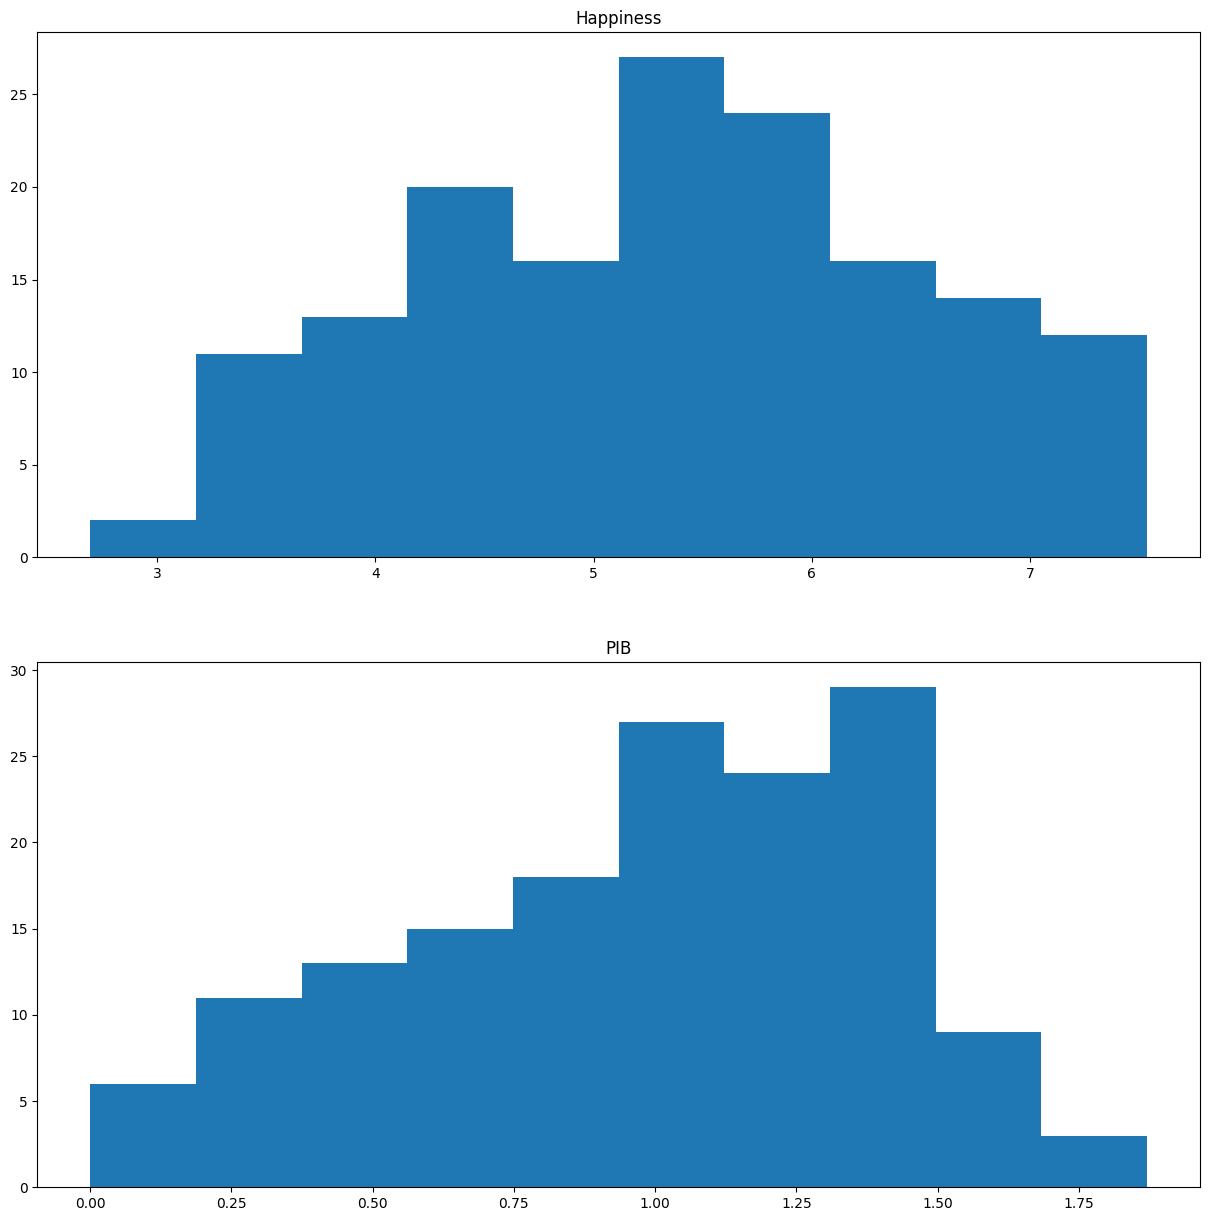

In [42]:
worldHappiness3 = readData3("2017.csv")
plotDataDistribution3(worldHappiness3)

### Plot data

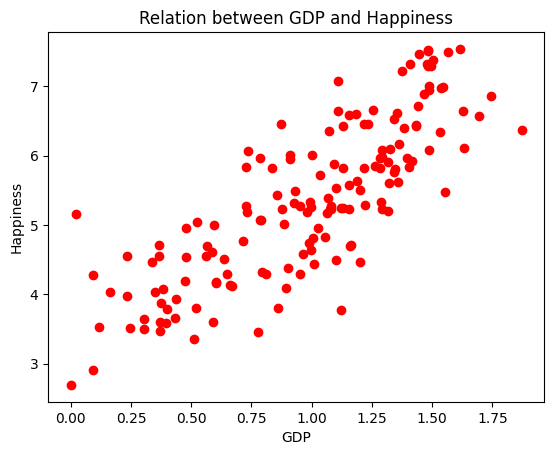

In [43]:
plotData3(worldHappiness3)

### Impartirea datelor in date de antrenament si date de test

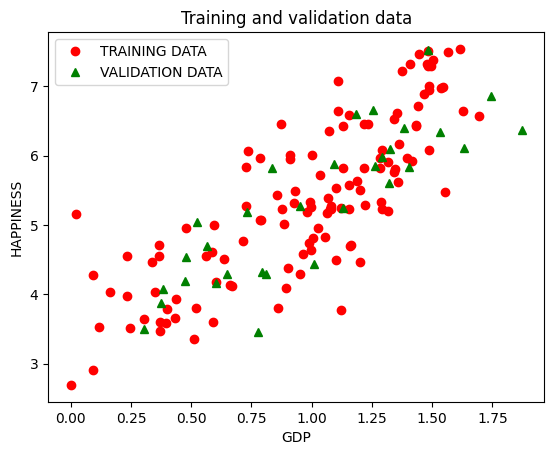

In [44]:
plotTrainingAndValidationSets3(worldHappiness3)

### Regresor

LEARNED MODEL: f(x) =  2.9709955810907758  +  2.422088133390026  * x
MANUAL ERROR =  0.3614298605414031
COMPUTED ERROR =  0.3614298605414031


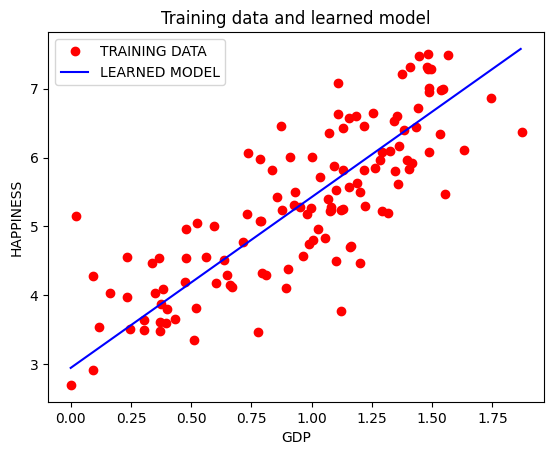

In [45]:
regressor3 = getRegressor(worldHappiness3)
w0, w1 = regressor3.coeficienti[0], regressor3.coeficienti[1]
print("LEARNED MODEL: f(x) = ", w0, " + ", w1, " * x")

manualError3, computedError3 = getErrors3(worldHappiness3)
print("MANUAL ERROR = ", manualError3)
print("COMPUTED ERROR = ", computedError3)
plotRegressor3(worldHappiness3)

## PIB si Freedom

In [46]:
def readData4(dataPath: str):
    world_happiness = pd.read_csv(dataPath, delimiter=',', header='infer')
    world_happiness["Happiness.Score"] = world_happiness["Happiness.Score"].fillna(world_happiness["Happiness.Score"].mode()[0])
    world_happiness["Economy..GDP.per.Capita."] = world_happiness["Economy..GDP.per.Capita."].fillna(world_happiness["Economy..GDP.per.Capita."].mode()[0])
    world_happiness["Freedom"] = world_happiness["Freedom"].fillna(world_happiness["Freedom"].mode()[0])
    
    q1= world_happiness["Happiness.Score"].quantile(0.01)
    q2= world_happiness["Happiness.Score"].quantile(0.99)

    world_happiness = world_happiness[world_happiness["Happiness.Score"].between(q1,q2)]

    q3= world_happiness["Economy..GDP.per.Capita."].quantile(0.01)
    q4= world_happiness["Economy..GDP.per.Capita."].quantile(0.99)

    world_happiness = world_happiness[world_happiness["Economy..GDP.per.Capita."].between(q3,q4)]

    q5= world_happiness["Freedom"].quantile(0.01)
    q6= world_happiness["Freedom"].quantile(0.99)

    world_happiness = world_happiness[world_happiness["Freedom"].between(q5,q6)]
    return world_happiness


def plotDataDistribution4(dfWorldHappiness):
    fig, axes = plt.subplots(nrows=3, figsize=(15,15))
    axes[0].hist(dfWorldHappiness["Happiness.Score"])
    axes[0].set_title("Happiness")
    axes[1].hist(dfWorldHappiness["Economy..GDP.per.Capita."])
    axes[1].set_title("PIB")
    axes[2].hist(dfWorldHappiness["Freedom"])
    axes[2].set_title("Freedom")
    plt.show()

def plotData4(dfWorldHappiness):
    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')
    axes.scatter(dfWorldHappiness["Economy..GDP.per.Capita."], dfWorldHappiness["Freedom"],dfWorldHappiness["Happiness.Score"], 'ro')
    axes.set_xlabel('GDP')
    axes.set_ylabel('Freedom')
    axes.set_zlabel('Happiness')
    axes.set_title('Relation between GDP, Freedom and Happiness')
    plt.show()

def getTrainingAndValidationSets4(dfWorldHappiness):
    dataSize = dfWorldHappiness.shape[0]
    
    trainingIndexSet = np.random.choice(range(dataSize), size=int(0.8 * dataSize), replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet]

    trainingInputSet = [[dfWorldHappiness["Economy..GDP.per.Capita."].iloc[index], dfWorldHappiness["Freedom"].iloc[index]] for index in trainingIndexSet]
    trainingOutputSet = [dfWorldHappiness["Happiness.Score"].iloc[index] for index in trainingIndexSet]

    validationInputSet = [[dfWorldHappiness["Economy..GDP.per.Capita."].iloc[index], dfWorldHappiness["Freedom"].iloc[index]] for index in validationIndexSet]
    validationOutputSet = [dfWorldHappiness["Happiness.Score"].iloc[index] for index in validationIndexSet]

    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet


def plotTrainingAndValidationSets4(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets4(dfWorldHappiness)
    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')
    xvalue = [pereche[0] for pereche in trainingInputSet] #gdp
    yvalue = [pereche[1] for pereche in trainingInputSet] #freedom
    zvalue = trainingOutputSet #happiness

    xvalueValidation = [pereche[0] for pereche in validationInputSet] #gdp
    yvalueValidation = [pereche[1] for pereche in validationInputSet] #freedom
    zvalueValidation = validationOutputSet #happiness

    axes.scatter(xvalue, yvalue, zvalue, 'ro')
    axes.scatter(xvalueValidation, yvalueValidation, zvalueValidation, 'g^')

    axes.set_xlabel('GDP')
    axes.set_ylabel('Freedom')
    axes.set_zlabel('Happiness')
    axes.set_title('Relation between GDP, Freedom and Happiness')
    plt.show()
    

def getRegressor2(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets4(dfWorldHappiness)
    X = [el for el in trainingInputSet]
    regressor = MyRegressor()
    regressor.train(X, trainingOutputSet)
    return regressor

def plotRegressor4(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets4(dfWorldHappiness)
    trainingInputSet = np.array(trainingInputSet)  # Convert to NumPy array
    regressor = getRegressor2(dfWorldHappiness)
    w0, w1, w2 = regressor.coeficienti[0], regressor.coeficienti[1], regressor.coeficienti[2]
    
    # Generate data for plotting the plane
    x_min, x_max = np.min(trainingInputSet[:,0]), np.max(trainingInputSet[:,0])
    y_min, y_max = np.min(trainingInputSet[:,1]), np.max(trainingInputSet[:,1])
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))
    zz = w0 + w1 * xx + w2 * yy

    # Plot the data points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(trainingInputSet[:,0], trainingInputSet[:,1], trainingOutputSet, c='b', marker='o', label='Training Data')
    
    # Plot the plane representing the model
    ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis', label='Model Plane')
    
    ax.set_title('Training Data and Model Plane')
    ax.set_xlabel('GDP')
    ax.set_ylabel('Freedom')
    ax.set_zlabel('Happiness')
    
    plt.show()

def getErrors4(dfWorldHappiness):
    _,_, validationInputSet, validationOutputSet = getTrainingAndValidationSets4(dfWorldHappiness)
    regressor = getRegressor2(dfWorldHappiness)
    computedValidationOutputs = regressor.predict(validationInputSet)
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputSet):
        manualError += (t1 - t2)**2
    manualError = manualError / len(validationOutputSet)
    computedError = mean_squared_error(validationOutputSet, computedValidationOutputs)
    return manualError, computedError


### Distributia datelor

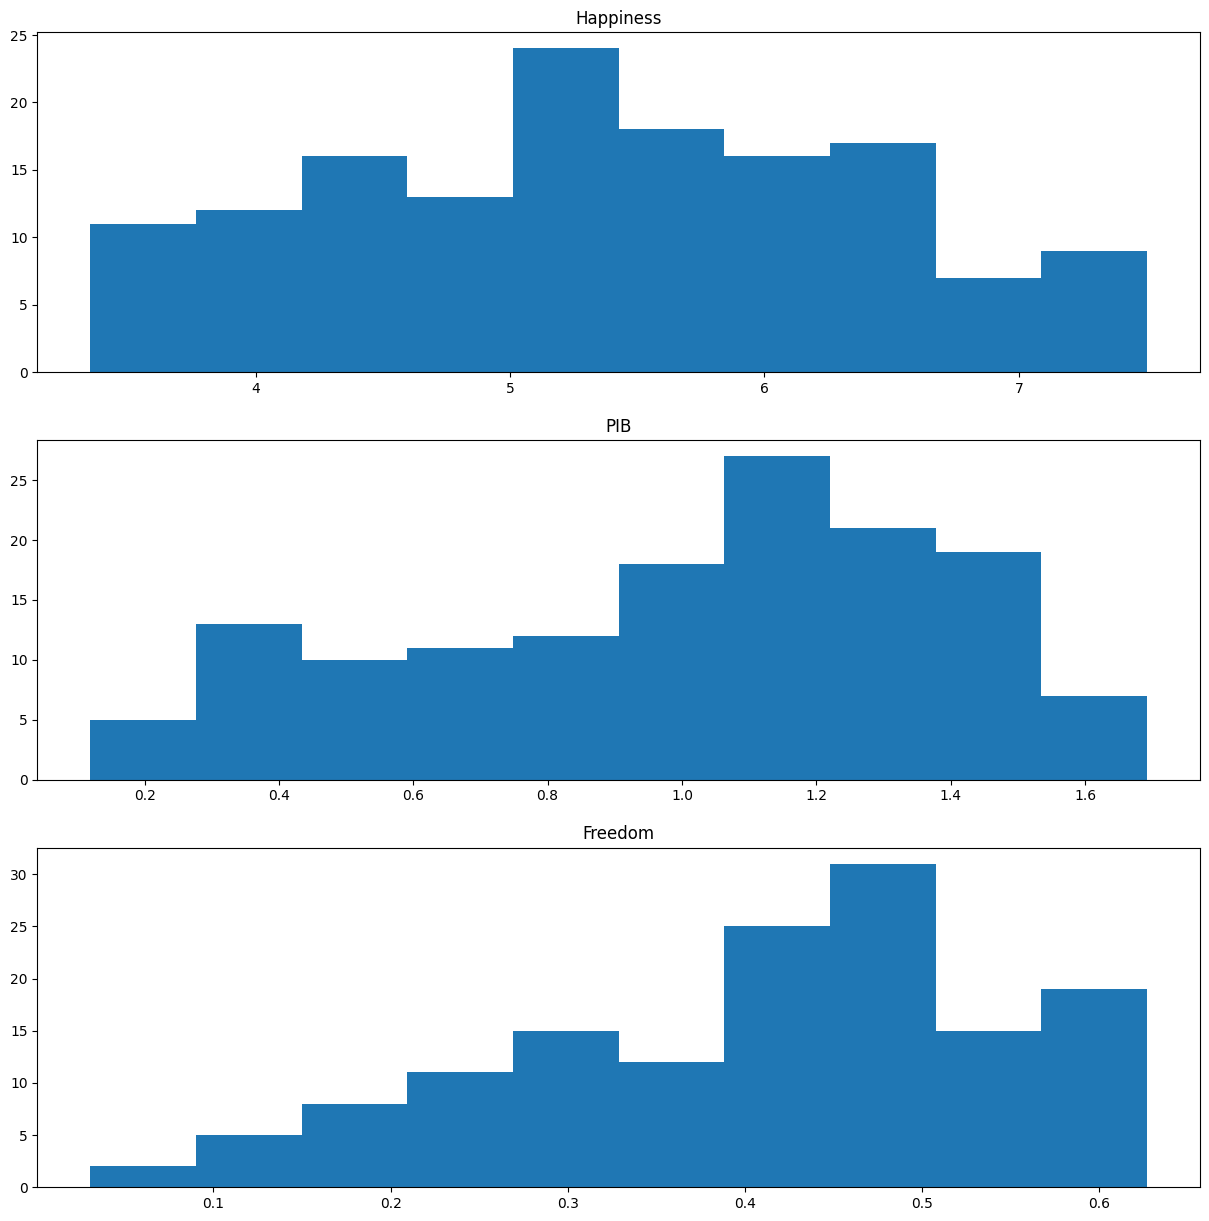

In [48]:
worldHappiness4 = readData4("2017.csv")
plotDataDistribution4(worldHappiness4)

### Plot data

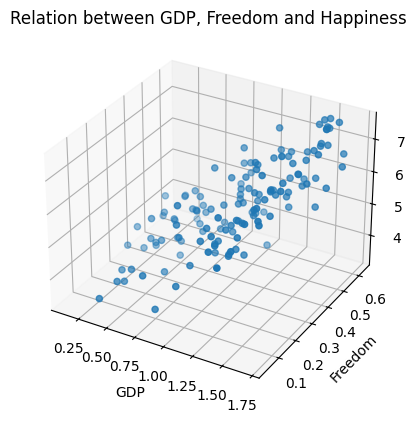

In [49]:
plotData4(worldHappiness4)

### Impartirea datelor in date de antrenament si date de test

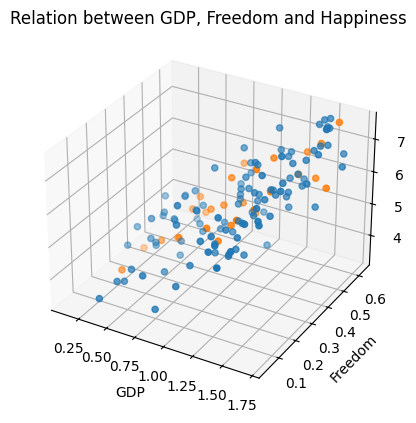

In [50]:
plotTrainingAndValidationSets4(worldHappiness4)

### Regresor

LEARNED MODEL: f(x) =  2.544848195391124  +  2.2836243580925717  * x1  +  1.2225229281184258  * x2
MANUAL ERROR =  0.28370168695466613
COMPUTED ERROR =  0.28370168695466613


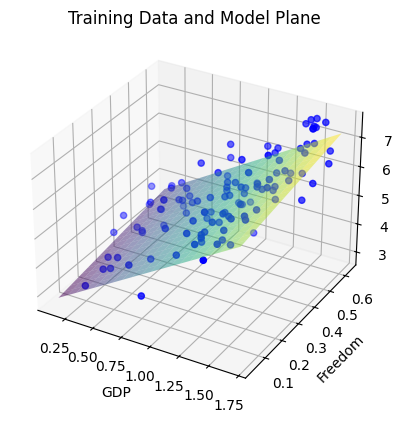

In [52]:
regressor4 = getRegressor2(worldHappiness4)
w0, w1, w2 = regressor4.coeficienti[0], regressor4.coeficienti[1], regressor4.coeficienti[2]
print("LEARNED MODEL: f(x) = ", w0, " + ", w1, " * x1", " + ", w2, " * x2")

manualError4, computedError4 = getErrors4(worldHappiness4)
print("MANUAL ERROR = ", manualError4)
print("COMPUTED ERROR = ", computedError4)
plotRegressor4(worldHappiness4)